# Data Preprocessing

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
# Check if Data has missing value
data.isnull().values.all()

False

# Splitting Data (Input - output)

In [6]:
data_input = data.drop(columns=["DEATH_EVENT"])
data_output = data["DEATH_EVENT"]

In [7]:
data_input.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [8]:
data_output

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# Splitting Data (Train - Validation - Test)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x , x_test , y , y_test = train_test_split(data_input , data_output , test_size=0.25 , random_state=1)

x_train , x_val , y_train , y_val = train_test_split(x , y , test_size=0.25 , random_state=1)

In [11]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (168, 12)
y_train: (168,)
------------
x_val: (56, 12)
y_val: (56,)
------------
x_test: (75, 12)
y_test: (75,)


In [12]:
print('Train size =', x_train.shape[0])
print('Val size =', x_val.shape[0])
print('Test size =', x_test.shape[0])

Train size = 168
Val size = 56
Test size = 75


In [13]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
126,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100
213,48.0,1,131,1,30,1,244000.00,1.60,130,0,0,193
37,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30
20,65.0,1,52,0,25,1,276000.00,1.30,137,0,0,16
266,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241


# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train) # for train (input)

x_train_scaled = scaler.transform(x_train)  # after appling equation
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)

In [16]:
x_train_scaled.head()  # Ranges perfect

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-1.258731,-0.919866,-0.397305,1.140776,-1.802203,1.307546,0.119114,0.529066,-2.704707,-1.341641,-0.632456,-0.378349
1,-1.092549,1.087115,-0.430280,1.140776,-0.673759,1.307546,-0.159408,0.111539,-1.436050,-1.341641,-0.632456,0.818276
2,1.732548,1.087115,0.214965,1.140776,1.062308,1.307546,0.634897,-0.389493,1.735594,-1.341641,-0.632456,-1.279036
3,0.320000,1.087115,-0.500687,-0.876596,-1.107776,1.307546,0.170693,-0.138977,0.044051,-1.341641,-0.632456,-1.459173
4,-0.510911,-0.919866,0.521546,-0.876596,-1.541793,-0.764791,0.040282,0.303602,-0.590278,0.745356,1.581139,1.435890


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf_tree  = DecisionTreeClassifier(max_depth = 3,random_state=1)

clf_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [19]:
y_pred_train = clf_tree.predict(x_train_scaled)
y_pred_val = clf_tree.predict(x_val_scaled)

# Accuracy

In [20]:
from sklearn.metrics import accuracy_score

In [43]:
print("Train Accuracy -->",accuracy_score(y_train,y_pred_train))
print("Validation Accuracy -->",accuracy_score(y_val, y_pred_val))

Train Accuracy --> 0.8630952380952381
Validation Accuracy --> 0.7321428571428571


In [22]:
y_pred_test = clf_tree.predict(x_test_scaled)
print("Test Accuracy -->",accuracy_score(y_test, y_pred_test))

Test Accuracy --> 0.84


# Logistic Regression

## Training and Validation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred_train = model.predict(x_train_scaled)
y_pred_val = model.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8630952380952381
0.7321428571428571


## Testing

In [46]:
y_pred_test = model.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.8666666666666667


# Support Vector Machine

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## POLY SVM

In [48]:
svc = SVC(kernel='poly', degree=3, random_state=0, C=0.9)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8452380952380952
0.6785714285714286


## Linear SVM

In [50]:
svc = SVC(kernel='linear', random_state=0, C=0.8)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8452380952380952
0.7678571428571429


## RBF SVM

In [52]:
svc = SVC(kernel='rbf', gamma=0.01, random_state=0, C=10.0)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8571428571428571
0.7142857142857143


## Testing

In [53]:
#Testing
y_pred_test = svc.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.8666666666666667


# Ensamble Learning


# Voting Classifier

In [54]:
from sklearn.ensemble import VotingClassifier

In [107]:
#function to evaluate training and validation of each model
def evaluate_model(clf ,x_train ,y_train ,x_val ,y_val):
    clf.fit(x_train , y_train )
    y_pred_train=clf.predict(x_train)
    y_pred_val=clf.predict(x_val)
    
    acc_train=accuracy_score(y_train , y_pred_train)
    acc_val=accuracy_score(y_val , y_pred_val)
    
    print(clf.__class__.__name__) 
    print("Accuracy of training:" , acc_train)
    print("Accuracy of validation:" ,acc_val)
    print("-----------------------------------------")
    return acc_train , acc_val
#end of function declaration

estimators=[
    ('tree',clf_tree ),
    ('logistic',model),
    ('svc',svc )
]
voting_clf=VotingClassifier(estimators)
all_estimators=estimators + [("voting",voting_clf)]
results = {                #(later for chart)
    "model" :[],
    "acc train":[],
    "acc val":[]
}
for name , clf in all_estimators:
    
    acc_train , acc_val = evaluate_model(clf ,x_train_scaled ,y_train ,x_val_scaled ,y_val)
    results["model"].append(name)
    results["acc train"].append(acc_train)
    results["acc val"].append(acc_val)

DecisionTreeClassifier
Accuracy of training: 0.8869047619047619
Accuracy of validation: 0.7321428571428571
-----------------------------------------
LogisticRegression
Accuracy of training: 0.8630952380952381
Accuracy of validation: 0.7321428571428571
-----------------------------------------
SVC
Accuracy of training: 0.8571428571428571
Accuracy of validation: 0.7142857142857143
-----------------------------------------
VotingClassifier
Accuracy of training: 0.8630952380952381
Accuracy of validation: 0.7321428571428571
-----------------------------------------


# Bagging Classifier

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bag_clf=BaggingClassifier(
    SVC(random_state=1),n_estimators=100,
    max_samples=0.90,bootstrap=True,random_state=1,n_jobs=-1
)
acc_train_bag , acc_val_bag = evaluate_model(bag_clf ,x_train_scaled ,y_train ,x_val_scaled ,y_val)

BaggingClassifier
Accuracy of training: 0.9047619047619048
Accuracy of validation: 0.7321428571428571
-----------------------------------------


# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

Rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)
acc_train_Rf, acc_val_Rf = evaluate_model(
Rf_clf,x_train_scaled ,y_train ,x_val_scaled ,y_val)

RandomForestClassifier
Accuracy of training: 0.9166666666666666
Accuracy of validation: 0.8035714285714286
-----------------------------------------


# Choose Best Model

In [124]:
all_results = {
'model': [],
'acc train': [],
'acc val': []
}
all_results['model'] =results['model'] + ['bagging', 'random forest']
all_results['acc train'] =  results['acc train']+[acc_train_bag, acc_train_Rf]
all_results['acc val'] =results['acc val'] +[acc_val_bag , acc_val_Rf]



In [118]:
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.sort_values( by='acc val', ascending=False, ignore_index=True)
all_results_df

,model,acc train,acc val
0,random forest,0.916667,0.803571
1,tree,0.886905,0.732143
2,logistic,0.863095,0.732143
3,voting,0.863095,0.732143
4,bagging,0.904762,0.732143
5,svc,0.857143,0.714286


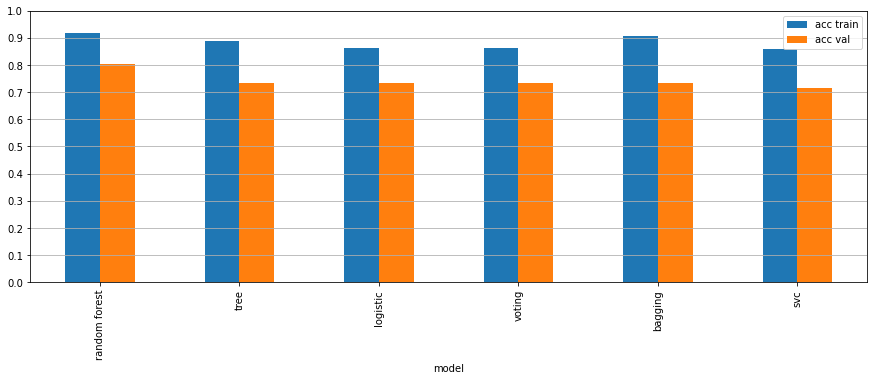

In [119]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
all_results_df.plot.bar(x="model" , y =["acc train" , "acc val"] , figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [125]:
model_best=RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)

model_best.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=1)

In [128]:
y_pred_test=model_best.predict(x_test_scaled)

In [129]:
accuracy_score(y_test , y_pred_test)

0.9066666666666666

# Save model

In [131]:
import pickle

with open('saved-model.pickle', 'wb') as f:
       pickle.dump(model_best, f)
        
with open('scaler.pickle', 'wb') as f:
       pickle.dump(scaler, f)